<a href="https://colab.research.google.com/github/danilopez8/GoogleColabSAA/blob/main/Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
banco=pd.read_csv('/content/sample_data/banco.csv')

In [ ]:
banco

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,balance
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,0,2324
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,0,1245
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,1,1290
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,0,1626
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,1,1344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40756,59.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,0,3328
40757,31.0,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,0,1072
40758,42.0,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,0,2240
40759,48.0,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,0,1375


In [ ]:
print('Datos numéricos')
display(banco.select_dtypes(include=['int64', 'float64']).describe())

print('Datos categóricos')
display(banco.select_dtypes(include=['object']).describe())

Datos numéricos


,age,duration,campaign,pdays,previous,y,balance
count,40760.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000
mean,40.051178,258.243910,2.568092,962.604794,0.172690,0.112436,1923.069944
std,10.874653,259.259809,2.772611,186.591317,0.494212,0.315906,2254.201992
min,17.000000,-5.000000,1.000000,0.000000,0.000000,0.000000,-200.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,0.000000,851.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1903.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,0.000000,2958.000000
max,600.000000,4918.000000,56.000000,999.000000,7.000000,1.000000,250000.000000


Datos categóricos


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,40761,40761,39555,40761,40761,40761,40761,40761,40761,40761
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10312,24661,11670,32245,21375,33600,25876,13623,8513,35201


In [ ]:
banco.shape

(40761, 17)

In [ ]:
banco[banco['age'].isna()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,balance


In [ ]:
#Añadimos la edad a quien le sale a nulo, en este caso una fila
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
banco['age'] = (imputer.fit_transform(banco[['age']])).astype(int)

In [ ]:
#Limpieza de datos faltantes
banco.isnull().sum()

,0
age,0
job,0
marital,0
education,1206
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
#Valores de una columna en este caso education
banco['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', nan, 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [ ]:
#Nulos en education
banco['education'].isna().sum()

np.int64(1206)

##Columnas irrelevantes

In [ ]:
#Columnas con un unico valor
banco.nunique()

,0
age,82
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


In [ ]:
cols_cat=banco.select_dtypes(include=['object']).columns
for col in cols_cat:
  print(col, banco[col].nunique())

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3


In [ ]:
banco.describe()

,age,duration,campaign,pdays,previous,y,balance
count,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000,40761.000000
mean,40.051176,258.243910,2.568092,962.604794,0.172690,0.112436,1923.069944
std,10.874520,259.259809,2.772611,186.591317,0.494212,0.315906,2254.201992
min,17.000000,-5.000000,1.000000,0.000000,0.000000,0.000000,-200.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,0.000000,851.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1903.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,0.000000,2958.000000
max,600.000000,4918.000000,56.000000,999.000000,7.000000,1.000000,250000.000000


In [ ]:
#Filas repetidas
banco.duplicated().sum()

np.int64(0)

##Outliers

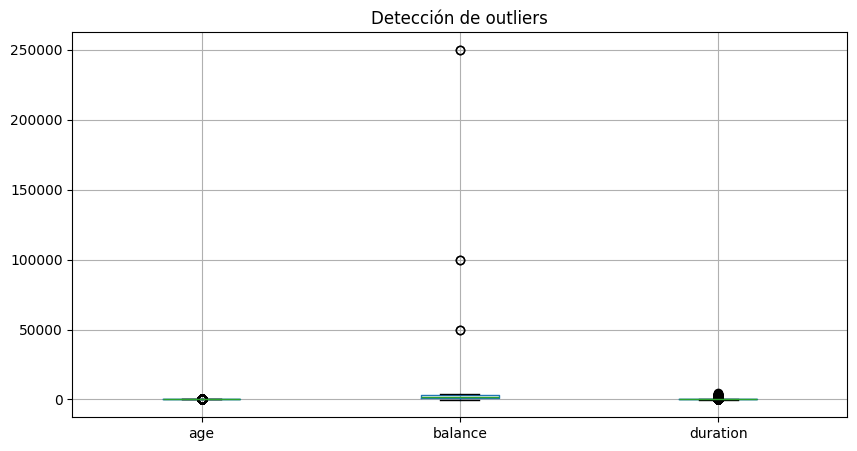

In [ ]:
banco[['age', 'balance', 'duration']].boxplot(figsize=(10,5))
plt.title("Detección de outliers")
plt.show()

In [ ]:
#Borrar las edades mayores de 100
banco=banco[banco['age']<100]

In [ ]:
for columna in cols_cat:
    # Asegurarse de que es una columna de texto
    if banco[columna].dtype == 'object':

        # Convertir a minúsculas
        banco[columna] = banco[columna].str.lower()

        # Quitar espacios extra al inicio o final
        banco[columna] = banco[columna].str.strip()

        # Imprimir valores únicos para revisión
        print(f"Valores en '{columna}': {banco[columna].unique()}")

/tmp/ipython-input-2646579420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banco[columna] = banco[columna].str.lower()
/tmp/ipython-input-2646579420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banco[columna] = banco[columna].str.strip()


Valores en 'job': ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'unemployed' 'entrepreneur' 'housemaid' 'self-employed' 'student']
Valores en 'marital': ['married' 'single' 'divorced']
Valores en 'education': ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y' nan
 'professional.course' 'basic.6y' 'illiterate']
Valores en 'default': ['unknown' 'no' 'yes']
Valores en 'housing': ['yes' 'no' 'unknown']
Valores en 'loan': ['no' 'yes']
Valores en 'contact': ['cellular' 'telephone']
Valores en 'month': ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
Valores en 'day_of_week': ['thu' 'fri' 'tue' 'mon' 'wed']
Valores en 'poutcome': ['nonexistent' 'success' 'failure']


In [ ]:
#Guardamos el dataset en uno limpio
banco.to_csv('banco_limpio.csv', index=False)